<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/3%EC%9E%A5_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5%EA%B3%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 7.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=2c1a8bf822e4453cfc023b6009c8dfedc8ff8e79eddebdb8c912ef951f3c6568
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 3.1 비지도 학습의 종류
* 비지도 학습 : 비지도 변환(unsupervised transformation)과 군집(clustering)
  * 비지도 변환은, 특성이 많은 고차원 데이터의 특성 수를 줄이고 꼭 필요한 특징을 포함한 데이터로 효현하는 방법인 차원 축소에서 많이 쓰인다
    - 여기서 궁금한 것? 선형 회귀에서 변수 선택법으로 전진탐색법 후진탐색법 등을 배웠는데 그들과 차이는?
    - 비지도 변환 후에 선형 회귀를 하면 전진선택법 등이 필요없어지나?
  * 비지도 변환으로 데이터를 구성하는 단위나 성분을 찾기도 한다. 텍스트 문서에서 주제를 추출하는 경우가 사례이다

  * 군집 알고리즘 : 데이터 간에 비슷한 것끼리 묶기. 
    업로드한 사진을 분류할 때, 같은 사람이 찍힌 사진을 같은 그룹으로 묶을 때


# 3.2 비지도 학습의 도전 과제

* 간단한 전처리 메소드
# 3.3 데이터 전처리와 스케일 조정
* 신경망이나 svm 같은 알고리즘은 데이터 스케일에 매우 민감해, 데이터 특성 값을 조정해야한다.

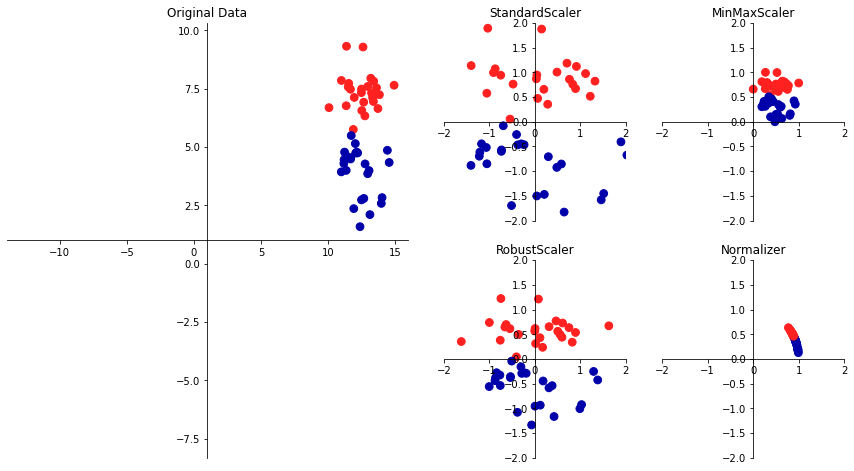

In [ ]:
mglearn.plots.plot_scaling()

## 3.3.1 여러가지 전처리 방법

## 3.3.2 데이터 변환 적용하기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [ ]:
type(cancer)

sklearn.utils.Bunch

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
# [,...,] -> 한 행 (value) 

In [5]:
pd.DataFrame(cancer.data, columns = cancer.feature_names).head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [7]:
scaler.fit(X_train)
# y_train 사용하지 않는다

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X_train_scaled = scaler.transform(X_train)
# fit 메서드로 학습한 변환을 적용하기 위한 작업

print('변환된 후 크기 : ', X_train.shape)
print('스케일 조정 후 특성별 최소값 : \n', X_train.min(axis = 0))
print('스케일 조정 후 특성별 최대값 : \n', X_train.max(axis = 0))
#axis = 0은 하나의 라벨에 대해서 아닌가?
print('스케일 조정 후 특성별 최소값 : \n', X_train_scaled.min(axis = 0))
print('스케일 조정 후 특성별 최대값 : \n', X_train_scaled.max(axis = 0))

변환된 후 크기 :  (426, 30)
스케일 조정 후 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 후 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
# 알고리즘(svm)에 적용하기 위해선 테스트 세트도 변환해야한다
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값 : \n", X_test_scaled.min(axis = 0))
print('스케일 조정 후 특성별 최대값 : \n', X_test_scaled.max(axis = 0))

스케일 조정 후 특성별 최소값 : 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값 : 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

In [10]:
# 유방암 데이터를 활용
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)
X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

In [ ]:
make_blobs()

(array([[  4.04620314,  -6.66344672],
        [  1.34612058,  -9.12548465],
        [  1.69627459,  -5.15061633],
        [  2.65969014,  -9.34632478],
        [  8.65692511,   0.70584954],
        [  1.267679  ,  -7.97339041],
        [  5.03807724,  -7.48648398],
        [  1.85871983,  -4.99885804],
        [  0.61796726,  -6.04688403],
        [  5.87264529,  -5.98757851],
        [  7.67964948,   0.93764302],
        [  4.61662879,  -5.95246035],
        [  6.89481907,   1.29621034],
        [  1.01045127,  -7.19128194],
        [  6.52140499,   1.30272966],
        [  1.23422709,  -7.67570641],
        [  7.83907985,   0.95441795],
        [  3.9557672 ,   1.99375189],
        [  8.30330212,   1.72794012],
        [  1.73459338,  -9.64463131],
        [  0.36785896,  -7.77706434],
        [  4.94538938,  -4.35900896],
        [  1.30947887,  -7.43919083],
        [  7.16378335,   2.25554932],
        [  8.36990976,   1.34765032],
        [  5.23189595,   2.78056859],
        [  0

In [ ]:
make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

(array([[ 7.33124533e+00, -1.09317870e+01],
        [ 9.19227792e+00,  5.90049310e+00],
        [-5.93198979e+00, -1.64709857e+00],
        [ 1.22853293e+01, -9.98451231e+00],
        [ 3.34864856e+00, -3.27420491e+00],
        [-3.71087149e+00, -1.55730654e+00],
        [ 1.28384026e+01,  2.07069557e+00],
        [-3.46385853e+00, -2.66288987e-03],
        [ 6.75876661e+00,  4.27759967e+00],
        [ 2.39709664e+00, -5.31938866e+00],
        [ 8.04518325e+00,  2.14179533e+00],
        [-6.82908995e+00, -7.42440001e-01],
        [ 7.37461347e+00,  1.05351046e+00],
        [-3.03095556e+00, -2.57674027e-01],
        [ 1.00050968e+01, -1.35030828e+00],
        [ 8.90128049e+00,  5.88934367e+00],
        [ 4.54885891e+00, -7.60176369e+00],
        [ 1.27251823e+01,  1.57438869e+00],
        [-4.84314674e+00, -9.26876945e-01],
        [ 9.66038265e+00, -1.47325133e+00],
        [-1.78260426e+00, -1.71853271e+00],
        [ 9.84242817e+00, -5.89522886e+00],
        [ 8.12682221e+00,  4.038

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_

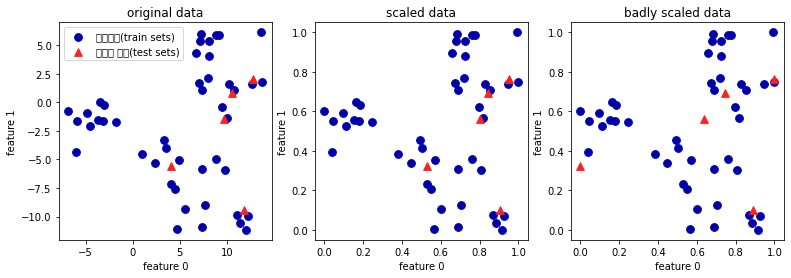

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (13,4))

axes[0].scatter(X_train[:,0], X_train[:,1],
                c = mglearn.cm2.colors[0], label = '훈련세트(train sets)', s = 60)
axes[0].scatter(X_test[:,0], X_test[:,1],
                marker = '^',
                c = mglearn.cm2.colors[1], label = '테스트 세트(test sets)', s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title('original data')


scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c = mglearn.cm2.colors[0], label = 'train sets', s = 60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1],
                marker = '^',
                c = mglearn.cm2.colors[1], label = 'test sets', s = 60)
axes[1].set_title('scaled data')

## 이해가 안되는 부분이 위에서 X_train에 대해서 minmaxscaler를 했잖아
## 그러면 아래에 minmaxscaler minmaxscaler 한 값을 모두 넣은게 아냐?
## 왜 잘못되었다고 하는거지?
## X_test에 대해서 fit해서? 
 
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c = mglearn.cm2.colors[0], label = 'training set', s= 60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled[:,1],
                marker = '^',
                c = mglearn.cm2.colors[1], label = 'test set', s = 60)
axes[2].set_title('badly scaled data')

for ax in axes:
  ax.set_xlabel('feature 0')
  ax.set_ylabel('feature 1')

# 위 질문에 대한 답 :
  # 세 번째 그래프는 훈련 세트와 테스트 세트의 스케일이 서로 다른 방식으로 조정된 모습이다
  # 테스트 포인트는 스케일이 다르게 조정되어, 훈련 세트와 다른 비율로 이동했다 (원본 데이터와 비교했을 때 다름 확인)
  

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [11]:
# MinMaxScaler 효과를 확인하기 위한 비교
# 원본 데이터로 SVC 모델

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C = 100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test , y_test)))

테스트 세트 정확도 : 0.94


In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X에 대해서 train, test 상관치 않고 minmaxscaler 적용

svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트 정확도 : {:.2f} ".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트 정확도 : 0.97 


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#train, test에 모두 스케일 조정
#y에는 안하네

svm.fit(X_train_scaled, y_train)
print("SVM test accuracy : {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy : 0.96


# 3.4 차원축소, 특성 추출, 매니폴드 학습
* PCA
* 비음수 행렬 분해 : 특성 추출에 널리 사용하는 알고리즘
* t - SNE : 2차원 산점도를 이용해 시각화 용도로 주로 사용되는 알고리즘

### 3.4.1 주성분 분석
- 특성들이 통계적으로 상관관계가 없도록 변환하는 일

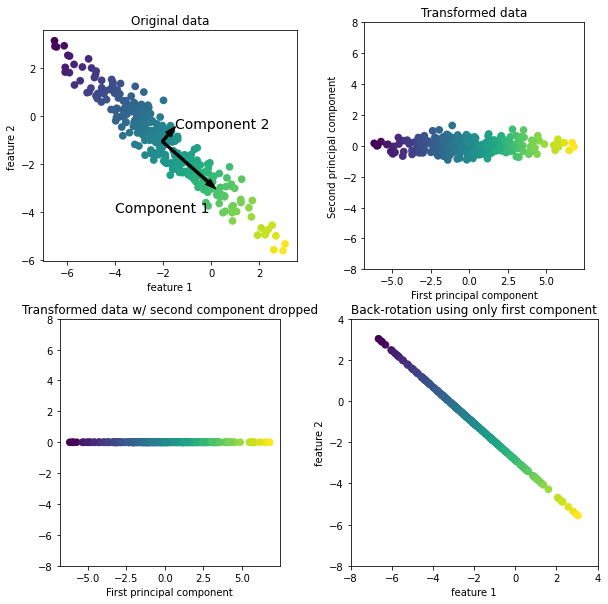

In [14]:
mglearn.plots.plot_pca_illustration()

In [ ]:
# 분산이 가장 큰 방향이다 즉, 데이터에서 가장 많은 정보를 담고 있다. = 특성들의 상관관계까 가장 크다

In [ ]:
# 주성분 : 데이터에 있는 주된 분산의 방향

PCA를 적용해 유방암 데이터셋 시각화하기

In [ ]:
# PCA는 주로 고차원 데이터셋의 시각화에서 많이 사용된다
# 세 개 이상의 특성을 가질 경우 산점도로 특성 간에 관계를 보기 어렵다
# 해결책 : 양성과 악성 두 클래스에 대해서 각 특성의 히스토그램을 그리기

# 산점도는 특성 간에 관계를 보기 위한 것
# 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리면, 악성 양성에 대한 관계를 볼 순 있겠지
# 한 특성에서 양성과 악성 두 클래스 값에 대한 걸 볼 수 있음

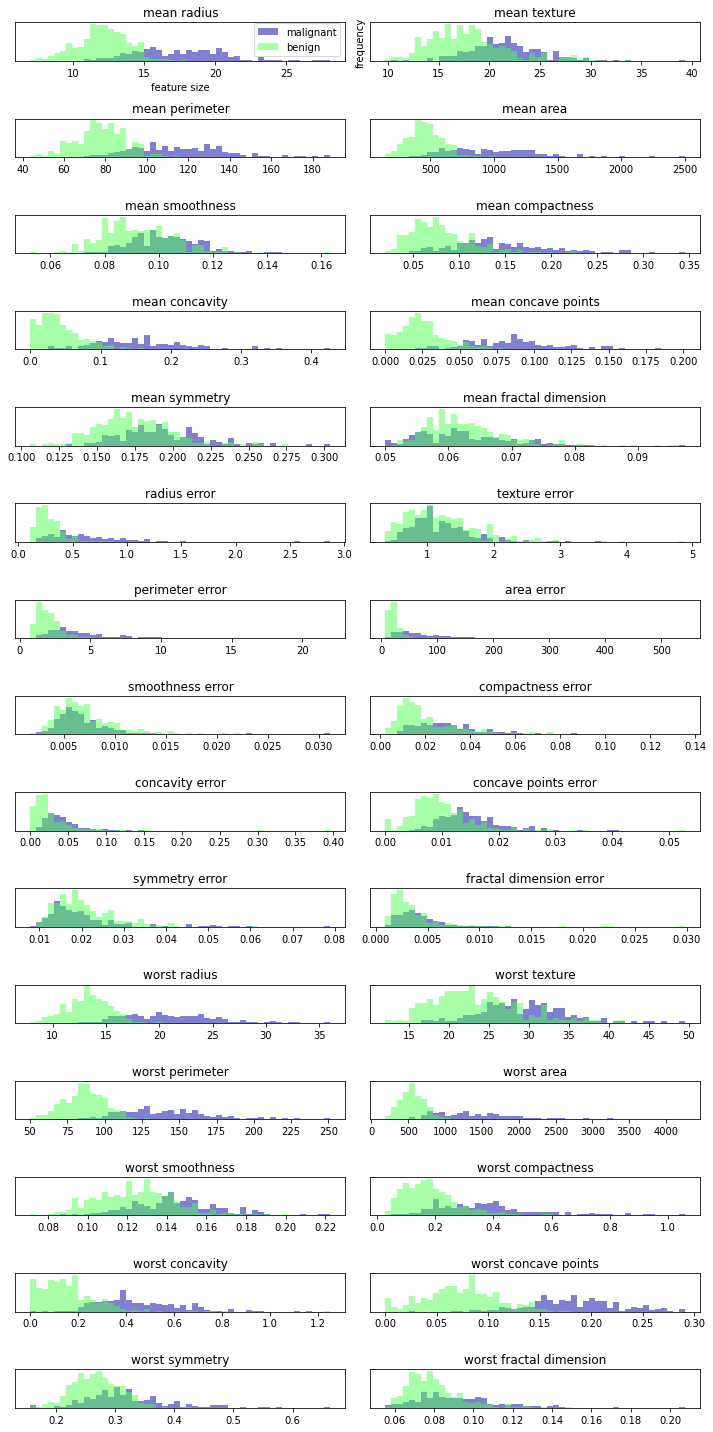

In [16]:
# 특성들이 클래스 별로 어떻게 분포됐는지 확인
# 어떤 특성이 양성/악성에 따라 구분하는 데 좋은지 가늠할 수 있다
fig, axes = plt.subplots(15,2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins = 50)
  ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha = .5)
  ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_xlabel('feature size')
ax[1].set_ylabel('frequency')
ax[0].legend(['malignant','benign'], loc = 'best')
fig.tight_layout()

# worst concave points 특성은 확실히 구분되어 매우 유용한 특성
# 주의 : 특성 간에 상호작용을 판단할 순 없다.

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 :",str(X_scaled.shape))
print("축소된 데이터 형태 :",str(X_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


In [24]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, ' the second pca')

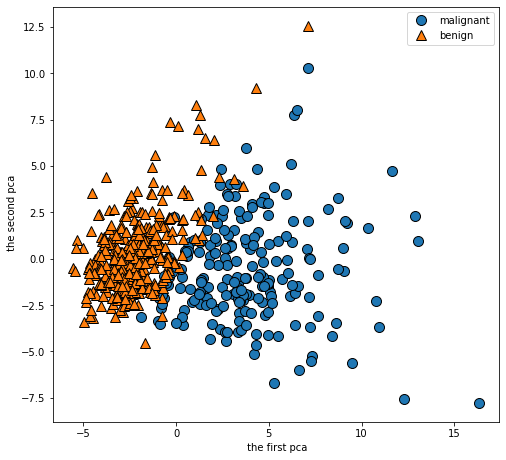

In [19]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['malignant','benign'], loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel(' the first pca')
plt.ylabel(' the second pca')
# 선형 분류기로 구분할 수 있겠다라고 판단함
# 두 변수 간에 관계가 '구분/분류'할 수 있다를 찾는 포인트였나?

In [25]:
print("PCA 주성분 형태 : ", pca.components_.shape)

PCA 주성분 형태 :  (2, 30)


In [26]:
print("PCA 주성분 : ", pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'pca')

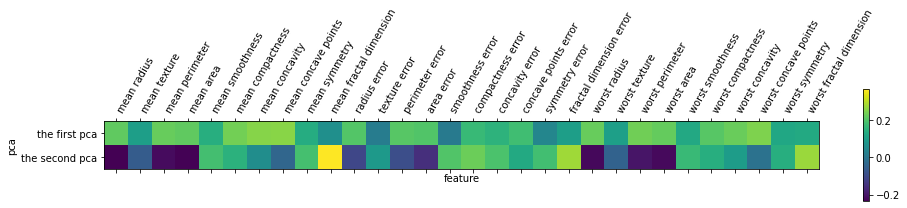

In [27]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['the first pca', 'the second pca']) 
#첫번째 주성분, 두번째 주성분
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel('feature')
plt.ylabel('pca')